In [1]:
import os
import pandas as pd

from flask import Flask
from flask import render_template
from flask import request
from flask import send_file
from flask_navigation import Navigation


import sqlalchemy
from sqlalchemy.orm import sessionmaker
from sqlalchemy import inspect
from sqlalchemy import func
from sqlalchemy.sql import text

import matplotlib.pyplot as plt

In [2]:
# project_dir = os.path.dirname(os.path.abspath(__file__))
database_file = "sqlite:///{}".format(
    # os.path.join(project_dir, "../data/gamedatabase.db")
    "../data/gamedatabase.db"
)

engine = sqlalchemy.create_engine(database_file)
with engine.connect() as connection:
  df = pd.read_sql("game", connection)

In [3]:
df.head()

,id,steam_appid,name,type,required_age,is_free,short_description,supported_languages,header_image,website,...,genres,coming_soon,release_date,num_reviews,review_score,total_positive,total_negative,total_reviews,support_url,support_email
0,422010,422010,Eczema Angel Orifice,game,0,False,the only game that will turn you into a woman,English<strong>*</strong><br><strong>*</strong...,https://cdn.akamai.steamstatic.com/steam/apps/...,None,...,"Adventure, Indie",False,"10 Apr, 2019",3,0,3,0,3,,horribletrashgame@gmail.com
1,422020,422020,Dark Days,game,0,False,In Dark Days you need to escape the infected i...,English<strong>*</strong><br><strong>*</strong...,https://cdn.akamai.steamstatic.com/steam/apps/...,http://darkdays.brutalstudio.net,...,"Action, Indie",False,"3 Jun, 2016",20,5,18,8,26,http://brutalstudio.net/en/gaming/#contact,info@brutalstudio.net
2,422030,422030,ReVeN: XBridge,game,0,False,XBridge is a 2D shooter online game set in the...,English<strong>*</strong><br><strong>*</strong...,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.variagamesllc.com,...,"Action, Indie, RPG",False,"22 May, 2017",6,0,3,3,6,www.variagamesllc.wix.com/revenxbridge,variagamesllc@gmail.com
3,422110,422110,Wand Wars,game,0,False,"Ride brooms, cast spells and transform your en...",English<strong>*</strong><br><strong>*</strong...,https://cdn.akamai.steamstatic.com/steam/apps/...,http://wandwars.com,...,"Action, Indie, Sports",False,"13 Apr, 2016",20,8,108,5,113,http://moonradish.com,support@moonradish.com
4,422130,422130,Comic Book Hero: The Greatest Cape,game,0,False,Assume the role of a masked crime fighter and ...,English<strong>*</strong><br><strong>*</strong...,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.greydogsoftware.com/cbh/,...,"RPG, Simulation",False,"9 Dec, 2015",1,5,21,29,50,http://support.encore.com,support@encore.com


In [4]:
from steam_analytics import calculate_unit_sold

In [17]:
df['year_of_release'] = df["release_date"].apply(lambda d: int(d[-4:]))
df['unit_sold'] = df.apply(lambda x: calculate_unit_sold(x.total_reviews, x.year_of_release), axis= 1)
df['revenue'] = df['unit_sold']* df["price_USD"]/ 1000000
df = df.sort_values(by =["revenue"],ascending=False)

In [7]:
df['genres'].head()

4018                                  Action, Adventure
4009                                  Action, Adventure
777                                   Action, Adventure
2084    Action, Adventure, Casual, Simulation, Strategy
1265                                  Action, Adventure
Name: genres, dtype: object

In [8]:
os_df= df[["name","windows","mac","linux"]]
os_name = "linux"
dd = df[os_name].value_counts()
print(dd.index.values)
print(dd.values)

[False True]
[3788  837]


Text(0.5, 1.0, 'Percentage of games are released on linux systems')

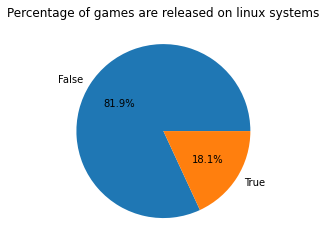

In [9]:
plt.pie(dd.values,labels = dd.index.values, autopct='%1.1f%%')
plt.title(f"Percentage of games are released on {os_name} systems")

In [18]:
revenue_df = df.sort_values(by =["revenue"],ascending=False)
revenue_df.head(5)

,id,steam_appid,name,type,required_age,is_free,short_description,supported_languages,header_image,website,...,num_reviews,review_score,total_positive,total_negative,total_reviews,support_url,support_email,year_of_release,unit_sold,revenue
4018,1172620,1172620,Sea of Thieves,game,0,False,Sea of Thieves offers the essential pirate exp...,"English<strong>*</strong>, French, Italian, Ge...",https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.seaofthieves.com,...,20,8,47422,4501,51923,https://support.seaofthieves.com,,2020,1557690,70.392011
4009,1172380,1172380,STAR WARS Jedi: Fallen Order™,game,0,False,A galaxy-spanning adventure awaits in Star War...,"English<strong>*</strong>, French<strong>*</st...",https://cdn.akamai.steamstatic.com/steam/apps/...,None,...,20,8,39063,3942,43005,https://help.ea.com/,,2019,1505175,68.018858
777,447040,447040,Watch_Dogs® 2,game,0,False,"Welcome to San Francisco. Play as Marcus, a br...","English<strong>*</strong>, French<strong>*</st...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://watchdogs.com/,...,15,8,11592,2614,14206,https://support.ubi.com/,,2016,710300,48.151237
2084,493340,493340,Planet Coaster,game,0,False,Planet Coaster® - the future of coaster park s...,"English, French, German, Spanish - Spain, Port...",https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.planetcoaster.com/,...,18,8,18484,2096,20580,https://support.frontier.co.uk/kb/,,2016,1029000,44.174970
1265,460930,460930,Tom Clancy's Ghost Recon® Wildlands,game,0,False,Create a team with up to 3 friends in Tom Clan...,"English<strong>*</strong>, French<strong>*</st...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://ghostrecon.com,...,20,6,14076,3616,17692,https://support.ubi.com/,,2017,707680,39.976843


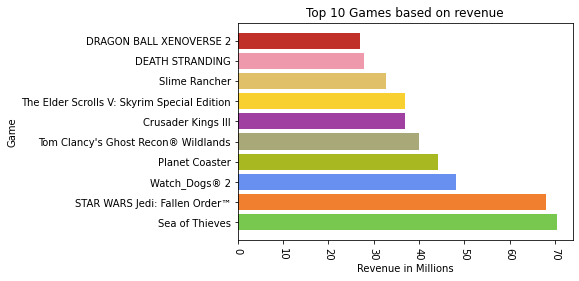

In [19]:
colors= ['#78C850','#F08030','#6890F0','#A8B820','#A8A878', '#A040A0', '#F8D030', '#E0C068',
'#EE99AC',  '#C03028', '#F85888', '#B8A038','#705898', '#98D8D8',  '#7038F8']
plt.barh(revenue_df.head(10)["name"],revenue_df.head(10)["revenue"], color= colors[:10])
plt.title("Top 10 Games based on revenue")
plt.xticks(rotation = -90)
plt.xlabel("Revenue in Millions")
plt.ylabel("Game")
plt.show()

In [20]:
b = df.groupby('year_of_release')['revenue'].sum()
b

year_of_release
2015      0.488577
2016    376.474554
2017    272.878546
2018     50.108320
2019    105.689347
2020    201.977176
2021      7.110466
Name: revenue, dtype: float64

Text(0, 0.5, 'Revenue in Millions')

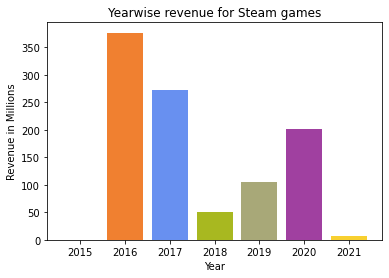

In [21]:
plt.bar(b.index.values,b.values, color = colors[:len(b.index.values)])
plt.title("Yearwise revenue for Steam games")
plt.xlabel("Year")
plt.ylabel("Revenue in Millions")

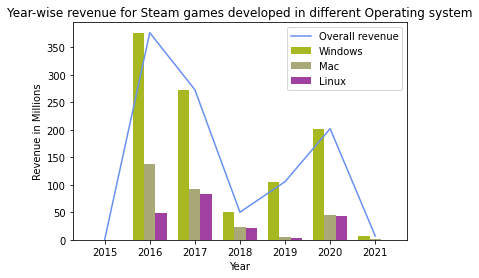

In [22]:
windows_revenue_df = df[df.windows == 1].groupby("year_of_release")['revenue'].sum()
mac_revenue_df = df[df.mac == 1].groupby("year_of_release")['revenue'].sum()
linux_revenue_df = df[df.linux == 1].groupby("year_of_release")['revenue'].sum()
X= windows_revenue_df.index.values
plt.plot(X, b.values, color = colors[2])
plt.bar(X - 0.25, windows_revenue_df.values, color = colors[3], width = 0.25)
plt.bar(X + 0.00, mac_revenue_df.values, color = colors[4], width = 0.25)
plt.bar(X + 0.25, linux_revenue_df.values, color = colors[5], width = 0.25)
plt.title("Year-wise revenue for Steam games developed in different Operating system")
plt.xlabel("Year")
plt.ylabel("Revenue in Millions")
plt.legend(labels=['Overall revenue','Windows', 'Mac', 'Linux'])

In [52]:
glist = []
for x in df[df.genres.notnull()]['genres']:
  a = x.split(', ')
  for n in a:
    if n not in glist:
      glist.append(n)
  

In [54]:
len(glist)

35

In [58]:
genres_df

,Action,Adventure,Casual,Simulation,Strategy,RPG,Indie,Massively Multiplayer,Avontuur,Simulatie,...,Video Production,Audio Production,Photo Editing,Education,Software Training,Accounting,Free to Play,Movie,Aktion,Abenteuer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
genres_df= pd.DataFrame(columns=glist)
# print(genres_df)
i =0
for sub in df[df.genres.notnull()]['genres']:
  genres_df.loc[len(genres_df)] = 0
  a = sub.split(', ')
  for x in a:
    genres_df.loc[len(genres_df)-1][x] = 1

# genres_df = pd.DataFrame([sub.split(",") for sub in df[df.genres.notnull()]['genres']])
print(genres_df)

     Action Adventure Casual Simulation Strategy RPG Indie  \
0         1         1      0          0        0   0     0   
1         1         1      0          0        0   0     0   
2         1         1      0          0        0   0     0   
3         1         1      1          1        1   0     0   
4         1         1      0          0        0   0     0   
...     ...       ...    ...        ...      ...  ..   ...   
4617      0         1      1          0        0   0     1   
4618      1         1      1          0        0   0     1   
4619      0         0      0          0        0   0     1   
4620      1         1      1          1        0   0     1   
4621      0         0      0          0        1   0     0   

     Massively Multiplayer Avontuur Simulatie  ... Video Production  \
0                        0        0         0  ...                0   
1                        0        0         0  ...                0   
2                        0        0       

In [61]:
genres_df["id"] = df["id"]
genres_df["revenue"] = df["revenue"]

In [62]:
genres_df.head()

,Action,Adventure,Casual,Simulation,Strategy,RPG,Indie,Massively Multiplayer,Avontuur,Simulatie,...,Photo Editing,Education,Software Training,Accounting,Free to Play,Movie,Aktion,Abenteuer,id,revenue
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,422010,0.000474
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,422020,0.004394
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,422030,0.002710
3,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,422110,0.076558
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,422130,0.056475


In [65]:
genres_rev=[]
for col in glist:
  genres_rev.append({"type": col, "revenue" : genres_df[genres_df[col]==1]['revenue'].sum()})

genres_rev = pd.DataFrame(genres_rev)

In [71]:
genres_rev = genres_rev.sort_values(by =["revenue"],ascending=False)

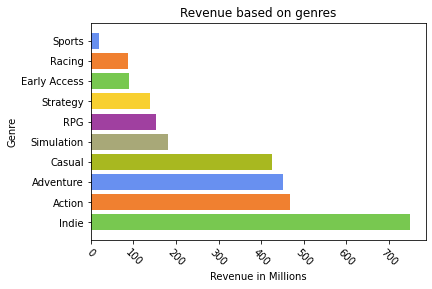

In [74]:
plt.barh(genres_rev.head(10).type,genres_rev.head(10).revenue, color = colors[:len(b.index.values)])
plt.title("Revenue based on genres")
plt.ylabel("Genre")
plt.xlabel("Revenue in Millions")
plt.xticks(rotation= -45)
plt.show()